<a href="https://colab.research.google.com/github/pszemkor/Sign/blob/master/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
# upload kaggle api token
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"przemysawjabecki","key":"d7a1a71dd117ec3a963ffdd08b086409"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s ASL

ref                                                          title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
grassknoted/asl-alphabet                                     ASL Alphabet                                        1GB  2018-04-22 19:31:36          14432  
danrasband/asl-alphabet-test                                 ASL Alphabet Test                                  24MB  2018-08-01 04:02:18           1332  
mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out    ASL Fingerspelling Images (RGB & Depth)             2GB  2019-12-17 02:52:11            346  
lucasvieirademiranda/aslalphabet                             asl-alphabet                                        2GB  2018-11-23 17:36:46            127  
datamunge/sign-language-mnist                                Sign Lang

In [ ]:
!kaggle datasets download -d 'grassknoted/asl-alphabet'

 99% 1.01G/1.03G [00:08<00:00, 156MB/s]
100% 1.03G/1.03G [00:08<00:00, 130MB/s]


In [ ]:
# verification 
!ls
!pwd

'120202265_950007148808605_213681937410813490_n (1).jpg'   asl-alphabet.zip
'120202265_950007148808605_213681937410813490_n (2).jpg'   kaggle.json
 120202265_950007148808605_213681937410813490_n.jpg	   sample_data
 120266368_708785279675645_7698824263835274813_n.jpg
/content


In [ ]:
import os
import zipfile

local_zip = '/content/asl-alphabet.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/asl')
zip_ref.close()

In [ ]:
train_data = os.path.join('/tmp/asl/asl_alphabet_train/asl_alphabet_train')
test_data = os.path.join('/tmp/asl/asl_alphabet_test/asl_alphabet_test')
os.listdir(train_data)

['space',
 'N',
 'U',
 'Q',
 'A',
 'O',
 'K',
 'G',
 'W',
 'I',
 'P',
 'D',
 'Z',
 'C',
 'M',
 'nothing',
 'del',
 'X',
 'B',
 'L',
 'T',
 'R',
 'F',
 'Y',
 'V',
 'E',
 'J',
 'S',
 'H']

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4
pic_index = 0

['A366.jpg', 'A1008.jpg', 'A525.jpg', 'A588.jpg', 'A1267.jpg', 'A1761.jpg', 'A2883.jpg', 'A2326.jpg', 'A2647.jpg', 'A1531.jpg', 'A1718.jpg', 'A1101.jpg', 'A2907.jpg', 'A2429.jpg', 'A1825.jpg', 'A1646.jpg', 'A553.jpg', 'A1956.jpg', 'A2780.jpg', 'A2802.jpg', 'A2035.jpg', 'A768.jpg', 'A2933.jpg', 'A2593.jpg', 'A1698.jpg', 'A2188.jpg', 'A2991.jpg', 'A303.jpg', 'A2340.jpg', 'A2987.jpg', 'A2569.jpg', 'A598.jpg', 'A2559.jpg', 'A2098.jpg', 'A2497.jpg', 'A742.jpg', 'A379.jpg', 'A1217.jpg', 'A1181.jpg', 'A2867.jpg', 'A463.jpg', 'A666.jpg', 'A1617.jpg', 'A2974.jpg', 'A129.jpg', 'A2441.jpg', 'A12.jpg', 'A2298.jpg', 'A2402.jpg', 'A2077.jpg', 'A465.jpg', 'A1396.jpg', 'A2654.jpg', 'A1532.jpg', 'A1297.jpg', 'A1635.jpg', 'A997.jpg', 'A1616.jpg', 'A270.jpg', 'A1430.jpg', 'A2440.jpg', 'A2430.jpg', 'A86.jpg', 'A2389.jpg', 'A1398.jpg', 'A659.jpg', 'A2070.jpg', 'A188.jpg', 'A849.jpg', 'A139.jpg', 'A2449.jpg', 'A1262.jpg', 'A2044.jpg', 'A306.jpg', 'A986.jpg', 'A641.jpg', 'A2305.jpg', 'A2495.jpg', 'A1361.jpg'

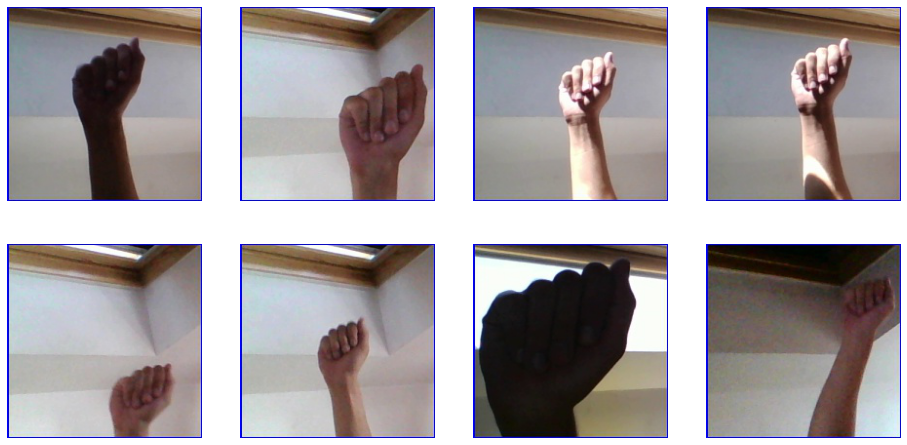

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
train_data_a_path = os.path.join(train_data,"A")
names = os.listdir(train_data_a_path)
print(names)
print(train_data_a_path)
pic_index += 8
pics = [os.path.join(train_data_a_path, fname) 
                for fname in names[pic_index-8:pic_index]]

for i, img_path in enumerate(pics):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, shear_range=0.2, zoom_range=0.2,)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_data,  target_size=(200,200), subset='training')
validation_generator = train_datagen.flow_from_directory(
        train_data, target_size=(200,200), subset='validation')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
from tensorflow.keras.callbacks import Callback

class AccCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs['accuracy'] > 0.95:
      print("Sufficient accuracy achieved")
      self.model.stop_training = True

In [ ]:
history = model.fit(
      train_generator,
      epochs=15,
      verbose=1,
      callbacks=[AccCallback()])

Epoch 1/15
2175/2175 [==============================] - 733s 337ms/step - loss: 0.6754 - accuracy: 0.7928
Epoch 2/15
2175/2175 [==============================] - 731s 336ms/step - loss: 0.0931 - accuracy: 0.9699


In [ ]:
ci = train_generator.class_indices
inv_map = {v: k for k, v in ci.items()}
print(inv_map)
import json   
json_object = json.dumps(inv_map, indent = 4)   
print(json_object)  

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}
{
    "0": "A",
    "1": "B",
    "2": "C",
    "3": "D",
    "4": "E",
    "5": "F",
    "6": "G",
    "7": "H",
    "8": "I",
    "9": "J",
    "10": "K",
    "11": "L",
    "12": "M",
    "13": "N",
    "14": "O",
    "15": "P",
    "16": "Q",
    "17": "R",
    "18": "S",
    "19": "T",
    "20": "U",
    "21": "V",
    "22": "W",
    "23": "X",
    "24": "Y",
    "25": "Z",
    "26": "del",
    "27": "nothing",
    "28": "space"
}


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200,200))
  x = image.img_to_array(img)
  print(x.shape)
  x = np.expand_dims(x, axis=0)
  print(x.shape)

  images = np.vstack([x])
  if model is None:
    model = load_model('/tmp/model.h5') 
  print(images.shape)
  print(type(images))
  classes = model.predict(images, batch_size=10)
  print(classes)
  max_id, max_prob = -1, -1
  for i in range(len(classes[0])):
    if classes[0][i] > max_prob:
      max_id = i
      max_prob = classes[0][i]
  print(inv_map)
  print("It is:", inv_map[max_id] )



Saving 120266368_708785279675645_7698824263835274813_n.jpg to 120266368_708785279675645_7698824263835274813_n.jpg
(200, 200, 3)
(1, 200, 200, 3)
(1, 200, 200, 3)
<class 'numpy.ndarray'>
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.9665233e-27 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


NameError: ignored

In [ ]:
model.save(filepath='/tmp/model.h5',save_format='h5')
